<a href="https://colab.research.google.com/github/Morris2727/python/blob/master/312657015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
!pip install pytorch

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


In [179]:
# For data loading and scientific computing
import pandas as pd
import numpy as np
import random
import os

# For data visualization
import matplotlib.pyplot as plt
import plotly.express as px

# Deep learning framework
import torch
import torch.nn as nn

# data processing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [180]:
class config:

    batch_size = 16
    lr = 1e-3
    epochs = 100
    weight_decay = 1e-2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    seed = 42

In [181]:
def seed_everything(seed):
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set PyTorch random seed for CPU and GPU
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    # Set PyTorch deterministic operations for cudnn backend
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [182]:
from google.colab import drive
drive.mount('/content/drive')
train_data = pd.read_csv("/content/drive/MyDrive/zip.train1.csv", header = None)
test_data = pd.read_csv("/content/drive/MyDrive/zip.test1.csv", header = None)
train_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,3,-1.0,-1.0,-1.0,-0.988,-0.527,-0.208,0.620,1.000,0.467,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7287,3,-1.0,-1.0,-1.0,-0.990,0.708,0.557,0.347,-0.107,-0.758,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7288,3,-1.0,-1.0,-1.0,-0.783,-0.984,-0.827,0.068,1.000,1.000,...,0.805,1.000,1.000,0.727,-0.342,-0.933,-1.000,-1.000,-1.000,-1.0
7289,0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.549,0.463,0.999,0.999,...,-0.231,0.621,0.999,-0.042,-0.231,-0.687,-1.000,-1.000,-1.000,-1.0


In [183]:
class HandwrittenDigits(torch.utils.data.Dataset):

    def __init__(self, df, transforms=None):
        self.df = df
        self.transforms = transforms

    def __getitem__(self, x):
        image, label = self.df.iloc[x, 1:].to_numpy(), self.df.iloc[x, 0]
        image, label = torch.tensor(image), torch.tensor(label)
        return image, label

    def __len__(self):
        return self.df.shape[0]

In [184]:
def split_ids(n, train_size, val_size):
    train_size = int(train_size * n)
    val_size = int(val_size * n)

    train_indices, val_indices = train_test_split(
        np.linspace(0, n - 1, n).astype("int"),
        test_size=val_size,
        random_state=42,
    )
    return train_indices, val_indices

In [185]:
dataset = HandwrittenDigits(train_data)
train_ids, val_ids= split_ids(train_data.shape[0], 0.8, 0.2)
train_dataset = torch.utils.data.Subset(dataset, train_ids)
val_dataset = torch.utils.data.Subset(dataset, val_ids)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)

#4. For each digit, plot 10 randomly selected images from your training dataset.

In [186]:
l = []
for i in range(10):
  l.append([])
for j in range(train_data.shape[0]):
  index = train_data[0][j]
  l[index].append(j)
print(l)

[[8, 11, 18, 49, 53, 58, 63, 65, 68, 72, 80, 95, 97, 101, 102, 104, 106, 108, 111, 116, 122, 130, 132, 134, 139, 157, 169, 176, 180, 185, 189, 192, 207, 218, 222, 225, 229, 235, 248, 254, 266, 270, 271, 272, 278, 279, 280, 283, 288, 294, 295, 304, 317, 321, 328, 332, 333, 334, 335, 355, 363, 365, 370, 372, 375, 388, 390, 400, 402, 405, 409, 411, 414, 419, 433, 435, 438, 443, 449, 451, 453, 458, 461, 471, 479, 481, 486, 489, 493, 498, 500, 513, 515, 520, 521, 528, 538, 541, 543, 548, 579, 580, 590, 595, 600, 637, 641, 649, 651, 654, 655, 657, 658, 662, 663, 667, 670, 672, 677, 682, 684, 687, 688, 690, 693, 708, 711, 716, 724, 731, 732, 733, 736, 737, 741, 742, 748, 754, 758, 759, 764, 767, 769, 774, 778, 779, 782, 784, 789, 793, 794, 799, 804, 807, 809, 813, 816, 820, 823, 824, 827, 829, 830, 833, 834, 835, 837, 839, 840, 845, 848, 849, 851, 853, 856, 857, 864, 865, 867, 869, 870, 874, 875, 878, 879, 882, 883, 885, 887, 888, 892, 893, 897, 898, 902, 915, 916, 919, 921, 923, 928, 930, 93

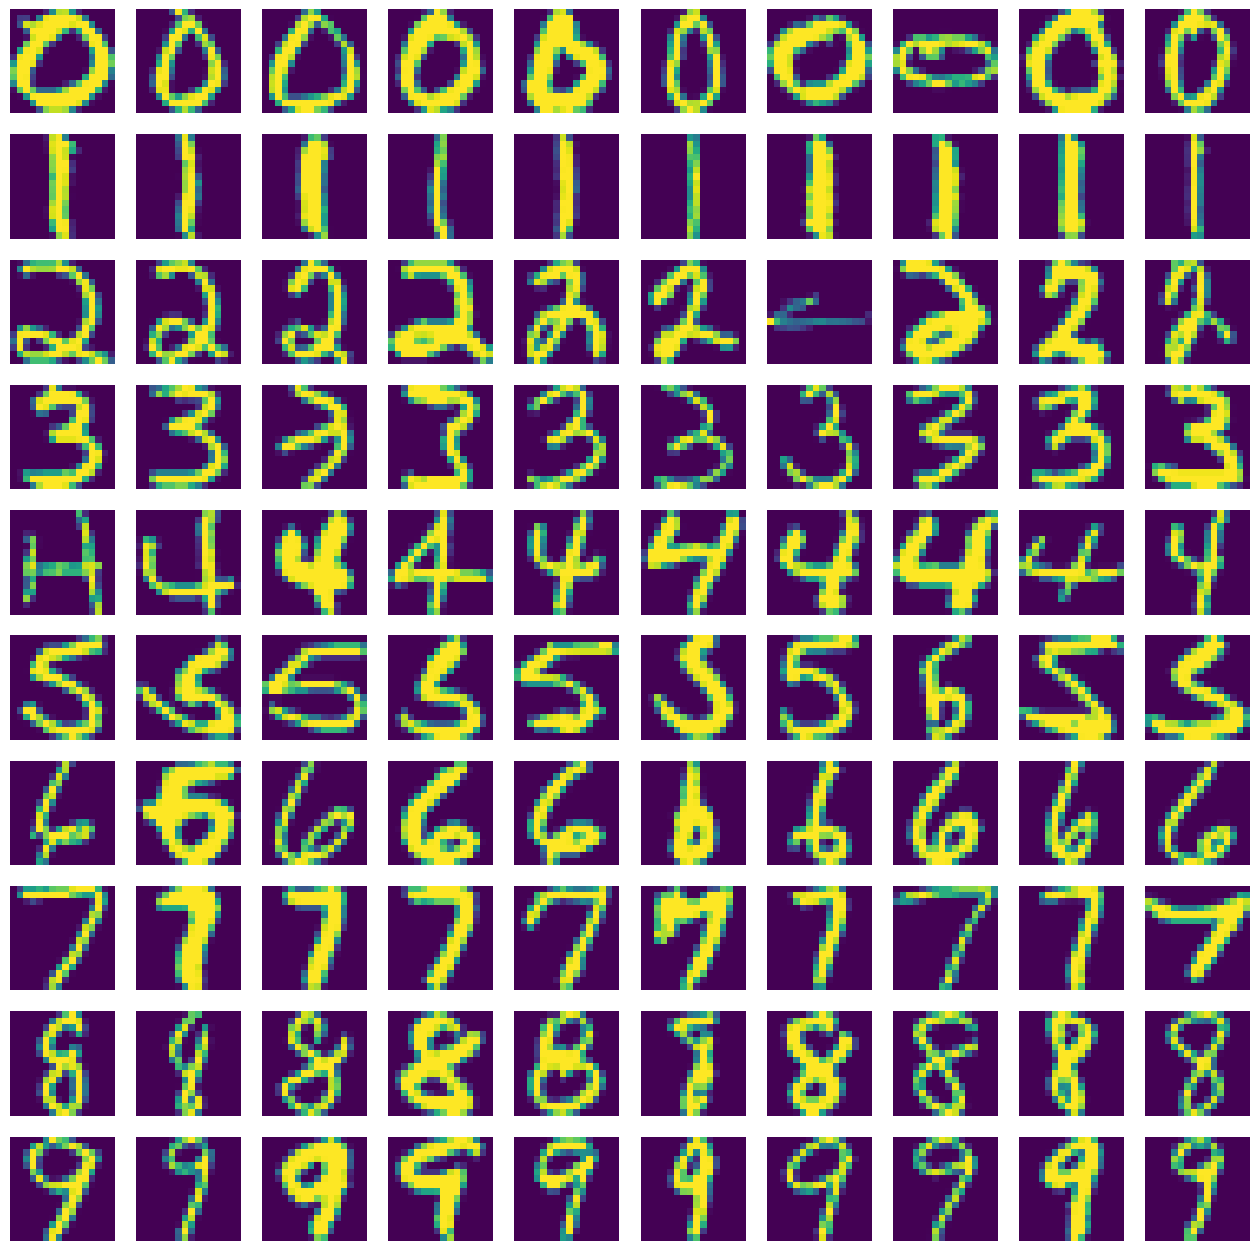

In [187]:
dataset = HandwrittenDigits(train_data)
plt.figure(figsize=(16,16))

for i in range(10):
  random_sample = random.sample(l[i],10)
  for j in range(10):
    image = dataset[random_sample[j]][0].numpy().reshape(16, 16)
    plt.subplot(10,10,10*i+(j+1))
    plt.imshow(image,vmin=-1,vmax=1)
    plt.axis('off')
    plt.subplots_adjust(wspace=None, hspace=None)


In [188]:
class HandwrittenDigitsfortest(torch.utils.data.Dataset):

    def __init__(self, df, transforms=None):
        self.df = df
        self.transforms = transforms

    def __getitem__(self, x):
        image = self.df.iloc[x, 0:].to_numpy()
        image = torch.tensor(image)
        return image

    def __len__(self):
        return self.df.shape[0]

In [189]:
dataset1 = HandwrittenDigitsfortest(test_data)

#5. Net-1

In [190]:
class Net_1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Net_1, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
#         self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
#         out = self.softmax(out)
        return out

In [191]:
input_dim =  256
hidden_dim = 12
output_dim = 10

model = Net_1(input_dim, hidden_dim, output_dim)
model

Net_1(
  (fc1): Linear(in_features=256, out_features=12, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=12, out_features=10, bias=True)
)

In [192]:
def evaluator(preds, gts):

    preds = preds.cpu().numpy() if isinstance(preds, torch.Tensor) else preds
    gts = gts.cpu().numpy() if isinstance(gts, torch.Tensor) else gts

    acc = accuracy_score(preds, gts)
    f1 = f1_score(preds, gts, average="macro")

    return acc, f1

def train_one_epoch(model, train_loader, optimizer, scheduler, criterion, device):
    model.train()
    train_loss = .0
    predictions, ground_truths = [], []
    for images, labels in train_loader:
        images = images.to(device=device, dtype=torch.float)
        labels = labels.to(device=device, dtype=torch.long)

        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()

        optimizer.step()
        scheduler.step()

        train_loss += loss.item()
        preds = torch.argmax(logits, dim=1)

        predictions.append(preds)
        ground_truths.append(labels)

    train_loss /= len(train_loader)

    predictions = torch.cat(predictions)
    ground_truths = torch.cat(ground_truths)
    train_acc, train_f1 = evaluator(predictions, ground_truths)

    return train_loss, 100*train_acc, 100*train_f1

def validation(model, valid_loader, criterion, device):
    model.eval()
    valid_loss = .0
    predictions, ground_truths = [], []
    with torch.no_grad():
        for images, labels in valid_loader:
            images = images.to(device=device, dtype=torch.float)
            labels = labels.to(device=device, dtype=torch.long)

            logits = model(images)
            loss = criterion(logits, labels)

            valid_loss += loss.item()
            preds = torch.argmax(logits, dim=1)

            predictions.append(preds)
            ground_truths.append(labels)

    valid_loss /= len(valid_loader)

    predictions = torch.cat(predictions)
    ground_truths = torch.cat(ground_truths)
    valid_acc, valid_f1 = evaluator(predictions, ground_truths)
    return valid_loss, 100*valid_acc, 100*valid_f1

Epoch[1/100], Train Loss: 2.2249, Train Accuracy: 22.27%, Train F1: 14.66% | Valid Loss: 2.0583, Valid Accuracy: 44.03%, Valid F1: 29.73% | LR: 0.000043
Epoch[2/100], Train Loss: 1.9226, Train Accuracy: 48.64%, Train F1: 33.76% | Valid Loss: 1.7247, Valid Accuracy: 53.84%, Valid F1: 36.84% | LR: 0.000050
Epoch[3/100], Train Loss: 1.6171, Train Accuracy: 53.20%, Train F1: 38.84% | Valid Loss: 1.4230, Valid Accuracy: 59.47%, Valid F1: 47.78% | LR: 0.000063
Epoch[4/100], Train Loss: 1.3263, Train Accuracy: 62.42%, Train F1: 55.29% | Valid Loss: 1.1279, Valid Accuracy: 72.77%, Valid F1: 68.16% | LR: 0.000082
Epoch[5/100], Train Loss: 1.0474, Train Accuracy: 76.27%, Train F1: 73.93% | Valid Loss: 0.8727, Valid Accuracy: 82.72%, Valid F1: 80.64% | LR: 0.000104
Epoch[6/100], Train Loss: 0.8065, Train Accuracy: 84.21%, Train F1: 82.84% | Valid Loss: 0.6679, Valid Accuracy: 86.90%, Valid F1: 85.40% | LR: 0.000132
Epoch[7/100], Train Loss: 0.6157, Train Accuracy: 87.64%, Train F1: 86.46% | Valid

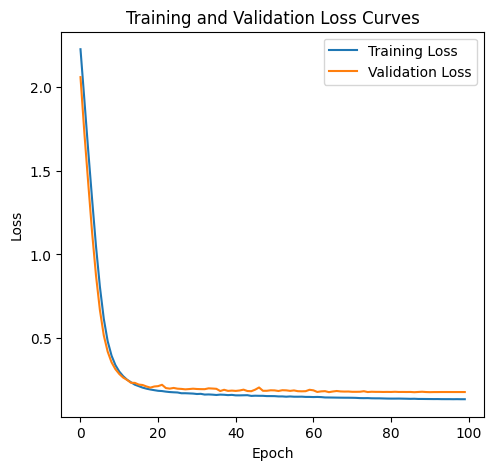

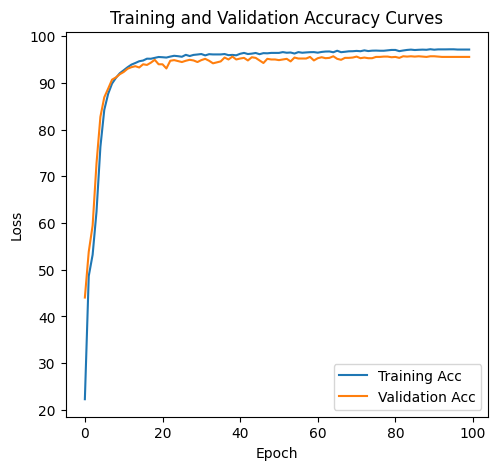

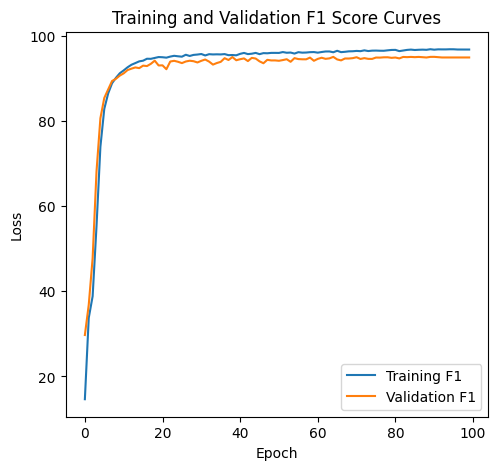

In [193]:
def main():

    seed_everything(config.seed)

    dataset = HandwrittenDigits(train_data)
    train_ids, val_ids= split_ids(train_data.shape[0], 0.8, 0.2)
    train_dataset = torch.utils.data.Subset(dataset, train_ids)
    val_dataset = torch.utils.data.Subset(dataset, val_ids)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)

    criterion = nn.CrossEntropyLoss()
    device = config.device
    model =  Net_1(input_dim, hidden_dim, output_dim)
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr, weight_decay=config.weight_decay)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        epochs=config.epochs,
        steps_per_epoch=train_loader.__len__(),
        max_lr=config.lr,
    )

    best_val_loss = float("inf")
    history = {
        "train": {
            "loss": [],
            "acc": [],
            "f1": []
        },
        "valid": {
            "loss": [],
            "acc": [],
            "f1": []
        },
    }
    for epoch in range(config.epochs):
        train_loss, train_acc, train_f1 = train_one_epoch(model, train_loader, optimizer, scheduler, criterion, device)
        valid_loss, valid_acc, valid_f1 = validation(model, val_loader, criterion, device)

        # Log the loss and validation result
        history["train"]["loss"].append(train_loss)
        history["train"]["acc"].append(train_acc)
        history["train"]["f1"].append(train_f1)
        history["valid"]["loss"].append(valid_loss)
        history["valid"]["acc"].append(valid_acc)
        history["valid"]["f1"].append(valid_f1)

        print(f'Epoch[{epoch+1}/{config.epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Train F1: {train_f1:.2f}% | Valid Loss: {valid_loss:.4f}, Valid Accuracy: {valid_acc:.2f}%, Valid F1: {valid_f1:.2f}% | LR: {optimizer.state_dict()["param_groups"][0]["lr"]:.6f}')

        if valid_loss < best_val_loss:
            save_file = {
                "model": model.state_dict(),
                "optimizer": optimizer.state_dict(),
                "scheduler": scheduler.state_dict(),
                "epoch": epoch,
                "args": config
            }
            best_val_loss = valid_loss
            torch.save(save_file, "checkpoint.pth")

    best_ckpt = torch.load("checkpoint.pth", map_location=device)
    model.load_state_dict(best_ckpt["model"])

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(config.epochs), history["train"]["loss"], label='Training Loss')
    plt.plot(range(config.epochs), history["valid"]["loss"], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss Curves')
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(config.epochs), history["train"]["acc"], label='Training Acc')
    plt.plot(range(config.epochs), history["valid"]["acc"], label='Validation Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Accuracy Curves')
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(config.epochs), history["train"]["f1"], label='Training F1')
    plt.plot(range(config.epochs), history["valid"]["f1"], label='Validation F1')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation F1 Score Curves')
    plt.show()

if __name__ == "__main__":
    main()

Epoch[1/100], Train Loss: 2.2249, Train Accuracy: 22.27%, Train F1: 14.66% | Valid Loss: 2.0583, Valid Accuracy: 44.03%, Valid F1: 29.73% | LR: 0.000043
Epoch[2/100], Train Loss: 1.9226, Train Accuracy: 48.64%, Train F1: 33.76% | Valid Loss: 1.7247, Valid Accuracy: 53.84%, Valid F1: 36.84% | LR: 0.000050
Epoch[3/100], Train Loss: 1.6171, Train Accuracy: 53.20%, Train F1: 38.84% | Valid Loss: 1.4230, Valid Accuracy: 59.47%, Valid F1: 47.78% | LR: 0.000063
Epoch[4/100], Train Loss: 1.3263, Train Accuracy: 62.42%, Train F1: 55.29% | Valid Loss: 1.1279, Valid Accuracy: 72.77%, Valid F1: 68.16% | LR: 0.000082
Epoch[5/100], Train Loss: 1.0474, Train Accuracy: 76.27%, Train F1: 73.93% | Valid Loss: 0.8727, Valid Accuracy: 82.72%, Valid F1: 80.64% | LR: 0.000104
Epoch[6/100], Train Loss: 0.8065, Train Accuracy: 84.21%, Train F1: 82.84% | Valid Loss: 0.6679, Valid Accuracy: 86.90%, Valid F1: 85.40% | LR: 0.000132
Epoch[7/100], Train Loss: 0.6157, Train Accuracy: 87.64%, Train F1: 86.46% | Valid

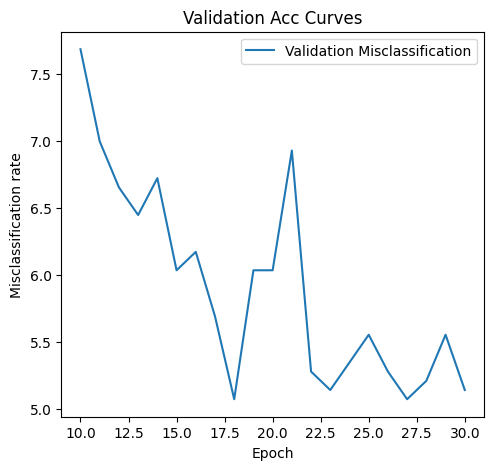

In [194]:
def main():

    seed_everything(config.seed)

    dataset = HandwrittenDigits(train_data)
    train_ids, val_ids= split_ids(train_data.shape[0], 0.8, 0.2)
    train_dataset = torch.utils.data.Subset(dataset, train_ids)
    val_dataset = torch.utils.data.Subset(dataset, val_ids)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)

    criterion = nn.CrossEntropyLoss()
    device = config.device
    model =  Net_1(input_dim, hidden_dim, output_dim)
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr, weight_decay=config.weight_decay)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        epochs=config.epochs,
        steps_per_epoch=train_loader.__len__(),
        max_lr=config.lr,
    )

    best_val_loss = float("inf")
    history = {
        "train": {
            "loss": [],
            "acc": [],
            "f1": []
        },
        "valid": {
            "loss": [],
            "acc": [],
            "f1": [],
            "mis":[]
        },
    }
    for epoch in range(config.epochs):
        train_loss, train_acc, train_f1 = train_one_epoch(model, train_loader, optimizer, scheduler, criterion, device)
        valid_loss, valid_acc, valid_f1 = validation(model, val_loader, criterion, device)
        valid_mis = 100-valid_acc

        history["train"]["loss"].append(train_loss)
        history["train"]["acc"].append(train_acc)
        history["train"]["f1"].append(train_f1)
        history["valid"]["loss"].append(valid_loss)
        history["valid"]["acc"].append(valid_acc)
        history["valid"]["mis"].append(valid_mis)
        history["valid"]["f1"].append(valid_f1)

        print(f'Epoch[{epoch+1}/{config.epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Train F1: {train_f1:.2f}% | Valid Loss: {valid_loss:.4f}, Valid Accuracy: {valid_acc:.2f}%, Valid F1: {valid_f1:.2f}% | LR: {optimizer.state_dict()["param_groups"][0]["lr"]:.6f}')

        if valid_loss < best_val_loss:
            save_file = {
                "model": model.state_dict(),
                "optimizer": optimizer.state_dict(),
                "scheduler": scheduler.state_dict(),
                "epoch": epoch,
                "args": config
            }
            best_val_loss = valid_loss
            torch.save(save_file, "checkpoint.pth")

    best_ckpt = torch.load("checkpoint.pth", map_location=device)
    model.load_state_dict(best_ckpt["model"])


    plt.show()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(10,31), history["valid"]["mis"][10:31], label='Validation Misclassification')
    plt.xlabel('Epoch')
    plt.ylabel('Misclassification rate')
    plt.legend()
    plt.title('Validation Acc Curves')
    plt.show()

if __name__ == "__main__":
    main()

In [195]:
def prediction(model, test_loader, device):
    model.eval()
    probability1, predictions1  = [], []
    with torch.no_grad():
        for images in test_loader:
            images = images.to(device=device, dtype=torch.float)

            logits = model(images)
            x = nn.Softmax(dim=1)
            probability = x(logits)
            predictions = torch.argmax(logits, dim=1)

            probability1.append(probability)
            predictions1.append(predictions)


    predictions1 = torch.cat(predictions1)
    probability1 = torch.cat(probability1)

    return probability1, predictions1

In [196]:
input_dim =  256
hidden_dim = 12
output_dim = 10

model = Net_1(input_dim, hidden_dim, output_dim)

best_ckpt = torch.load("checkpoint.pth")
model.load_state_dict(best_ckpt["model"])
dataset1 = HandwrittenDigitsfortest(test_data)
test_loader = torch.utils.data.DataLoader(dataset1, batch_size=config.batch_size, shuffle=False)
preds1,pro1 = prediction(model, test_loader, config.device)


In [197]:
print(preds1)
print(pro1)
print(preds1.numpy())
print(pro1.numpy())

tensor([[2.6736e-05, 1.6770e-05, 5.1094e-04,  ..., 2.8307e-02, 3.4206e-03,
         9.5543e-01],
        [5.1025e-03, 5.3460e-04, 2.4861e-02,  ..., 4.7876e-04, 2.7977e-04,
         4.6930e-05],
        [1.2484e-05, 6.0852e-06, 2.6581e-03,  ..., 4.3741e-04, 1.4486e-03,
         1.3469e-04],
        ...,
        [1.2229e-04, 2.6810e-05, 3.4803e-04,  ..., 1.0823e-04, 1.1068e-01,
         3.5349e-02],
        [9.9957e-01, 2.6733e-08, 4.5137e-05,  ..., 5.5131e-06, 1.2852e-04,
         3.8508e-07],
        [5.2123e-07, 9.9257e-01, 4.3138e-04,  ..., 3.5268e-04, 1.8319e-03,
         1.5994e-03]])
tensor([9, 6, 3,  ..., 4, 0, 1])
[[2.6736450e-05 1.6769789e-05 5.1094440e-04 ... 2.8307142e-02
  3.4206097e-03 9.5543242e-01]
 [5.1024500e-03 5.3459982e-04 2.4861142e-02 ... 4.7876040e-04
  2.7976761e-04 4.6930225e-05]
 [1.2484017e-05 6.0851526e-06 2.6580896e-03 ... 4.3740851e-04
  1.4486203e-03 1.3469257e-04]
 ...
 [1.2228549e-04 2.6809705e-05 3.4803170e-04 ... 1.0822791e-04
  1.1068043e-01 3.5348836

In [198]:
x = pd.DataFrame(preds1.numpy())
y = pd.DataFrame(pro1.numpy())
result1 = pd.concat([x, y], axis=1)

In [199]:
result1.columns=["0","1","2","3","4","5","6","7","8","9","pred1"]
result1

,0,1,2,3,4,5,6,7,8,9,pred1
0,2.673645e-05,1.676979e-05,0.000511,0.000856,1.140468e-02,0.000022,1.947549e-06,0.028307,0.003421,9.554324e-01,9
1,5.102450e-03,5.345998e-04,0.024861,0.000044,3.239810e-02,0.032649,9.036054e-01,0.000479,0.000280,4.693022e-05,6
2,1.248402e-05,6.085153e-06,0.002658,0.995146,2.308125e-07,0.000156,4.695231e-07,0.000437,0.001449,1.346926e-04,3
3,1.657497e-01,3.465325e-03,0.079406,0.000707,2.323692e-01,0.088755,4.094385e-01,0.012215,0.004310,3.583397e-03,6
4,4.340669e-03,1.086825e-04,0.002817,0.000025,1.133173e-05,0.004296,9.882963e-01,0.000023,0.000081,1.576908e-07,6
...,...,...,...,...,...,...,...,...,...,...,...
2002,4.674272e-04,5.526606e-05,0.003878,0.991487,1.306702e-07,0.003633,1.032846e-05,0.000220,0.000239,1.113837e-05,3
2003,1.218536e-06,1.690428e-04,0.000012,0.003444,7.445347e-03,0.000197,2.542698e-07,0.003545,0.004239,9.809470e-01,9
2004,1.222855e-04,2.680970e-05,0.000348,0.000082,8.531564e-01,0.000013,1.137620e-04,0.000108,0.110680,3.534884e-02,4
2005,9.995710e-01,2.673343e-08,0.000045,0.000004,1.718376e-07,0.000221,2.405894e-05,0.000006,0.000129,3.850797e-07,0


In [200]:
result1.to_csv('Net-1.csv', index=True,header=True)

#5. Net-2

In [201]:
class Net_2(nn.Module):
    def __init__(self, input_dim, hidden_dim, hidden_dim2 ,output_dim):
        super(Net_2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)

        return out

In [202]:
input_dim =  256
hidden_dim = 64
hidden_dim2 = 16
output_dim = 10

model = Net_2(input_dim, hidden_dim, hidden_dim2, output_dim)
model

Net_2(
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=16, out_features=10, bias=True)
)

In [203]:
def evaluator(preds, gts):

    preds = preds.cpu().numpy() if isinstance(preds, torch.Tensor) else preds
    gts = gts.cpu().numpy() if isinstance(gts, torch.Tensor) else gts

    acc = accuracy_score(preds, gts)
    f1 = f1_score(preds, gts, average="macro")

    return acc, f1

def train_one_epoch(model, train_loader, optimizer, scheduler, criterion, device):
    model.train()
    train_loss = .0
    predictions, ground_truths = [], []
    for images, labels in train_loader:
        images = images.to(device=device, dtype=torch.float)
        labels = labels.to(device=device, dtype=torch.long)

        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()

        optimizer.step()
        scheduler.step()

        train_loss += loss.item()
        preds = torch.argmax(logits, dim=1)

        predictions.append(preds)
        ground_truths.append(labels)

    train_loss /= len(train_loader)

    predictions = torch.cat(predictions)
    ground_truths = torch.cat(ground_truths)
    train_acc, train_f1 = evaluator(predictions, ground_truths)

    return train_loss, 100*train_acc, 100*train_f1

def validation(model, valid_loader, criterion, device):
    model.eval()
    valid_loss = .0
    predictions, ground_truths = [], []
    with torch.no_grad():
        for images, labels in valid_loader:
            images = images.to(device=device, dtype=torch.float)
            labels = labels.to(device=device, dtype=torch.long)

            logits = model(images)
            loss = criterion(logits, labels)

            valid_loss += loss.item()
            preds = torch.argmax(logits, dim=1)

            predictions.append(preds)
            ground_truths.append(labels)

    valid_loss /= len(valid_loader)

    predictions = torch.cat(predictions)
    ground_truths = torch.cat(ground_truths)
    valid_acc, valid_f1 = evaluator(predictions, ground_truths)
    return valid_loss, 100*valid_acc, 100*valid_f1

Epoch[1/100], Train Loss: 2.1479, Train Accuracy: 33.12%, Train F1: 19.86% | Valid Loss: 1.9549, Valid Accuracy: 48.35%, Valid F1: 31.01% | LR: 0.000043
Epoch[2/100], Train Loss: 1.7592, Train Accuracy: 51.60%, Train F1: 40.28% | Valid Loss: 1.4987, Valid Accuracy: 63.31%, Valid F1: 52.69% | LR: 0.000050
Epoch[3/100], Train Loss: 1.3180, Train Accuracy: 65.94%, Train F1: 57.36% | Valid Loss: 1.0824, Valid Accuracy: 74.42%, Valid F1: 68.42% | LR: 0.000063
Epoch[4/100], Train Loss: 0.9404, Train Accuracy: 78.76%, Train F1: 75.76% | Valid Loss: 0.7676, Valid Accuracy: 83.26%, Valid F1: 80.93% | LR: 0.000082
Epoch[5/100], Train Loss: 0.6671, Train Accuracy: 85.46%, Train F1: 83.66% | Valid Loss: 0.5662, Valid Accuracy: 86.69%, Valid F1: 85.09% | LR: 0.000104
Epoch[6/100], Train Loss: 0.4984, Train Accuracy: 88.38%, Train F1: 86.96% | Valid Loss: 0.4456, Valid Accuracy: 87.93%, Valid F1: 86.31% | LR: 0.000132
Epoch[7/100], Train Loss: 0.4013, Train Accuracy: 90.07%, Train F1: 88.83% | Valid

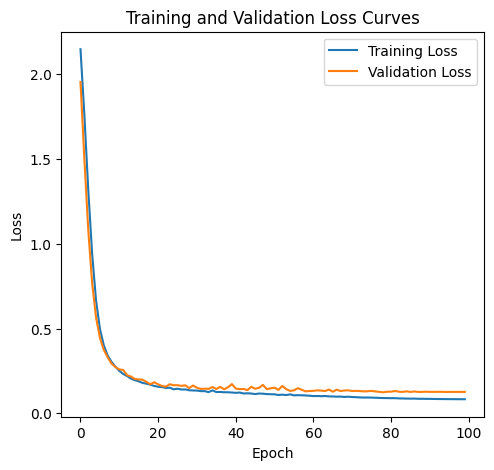

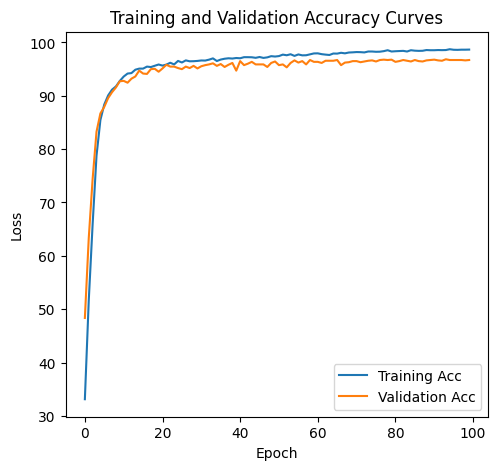

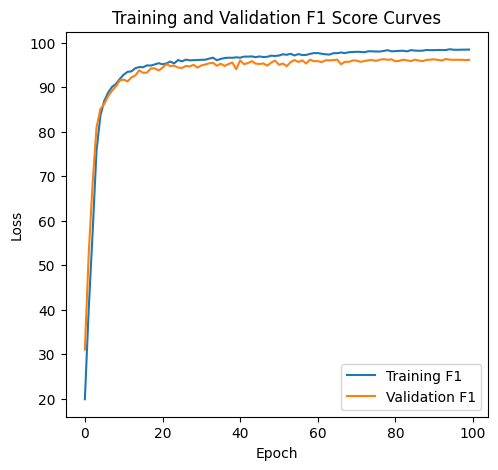

In [204]:
def main():

    seed_everything(config.seed)

    dataset = HandwrittenDigits(train_data)
    train_ids, val_ids= split_ids(train_data.shape[0], 0.8, 0.2)
    train_dataset = torch.utils.data.Subset(dataset, train_ids)
    val_dataset = torch.utils.data.Subset(dataset, val_ids)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)

    criterion = nn.CrossEntropyLoss()
    device = config.device
    model =  Net_2(input_dim, hidden_dim, hidden_dim2, output_dim)
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr, weight_decay=config.weight_decay)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        epochs=config.epochs,
        steps_per_epoch=train_loader.__len__(),
        max_lr=config.lr,
    )

    best_val_loss = float("inf")
    history = {
        "train": {
            "loss": [],
            "acc": [],
            "f1": []
        },
        "valid": {
            "loss": [],
            "acc": [],
            "f1": []
        },
    }
    for epoch in range(config.epochs):
        train_loss, train_acc, train_f1 = train_one_epoch(model, train_loader, optimizer, scheduler, criterion, device)
        valid_loss, valid_acc, valid_f1 = validation(model, val_loader, criterion, device)

        # Log the loss and validation result
        history["train"]["loss"].append(train_loss)
        history["train"]["acc"].append(train_acc)
        history["train"]["f1"].append(train_f1)
        history["valid"]["loss"].append(valid_loss)
        history["valid"]["acc"].append(valid_acc)
        history["valid"]["f1"].append(valid_f1)

        print(f'Epoch[{epoch+1}/{config.epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Train F1: {train_f1:.2f}% | Valid Loss: {valid_loss:.4f}, Valid Accuracy: {valid_acc:.2f}%, Valid F1: {valid_f1:.2f}% | LR: {optimizer.state_dict()["param_groups"][0]["lr"]:.6f}')

        if valid_loss < best_val_loss:
            save_file = {
                "model": model.state_dict(),
                "optimizer": optimizer.state_dict(),
                "scheduler": scheduler.state_dict(),
                "epoch": epoch,
                "args": config
            }
            best_val_loss = valid_loss
            torch.save(save_file, "checkpoint.pth")

    best_ckpt = torch.load("checkpoint.pth", map_location=device)
    model.load_state_dict(best_ckpt["model"])

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(config.epochs), history["train"]["loss"], label='Training Loss')
    plt.plot(range(config.epochs), history["valid"]["loss"], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss Curves')
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(config.epochs), history["train"]["acc"], label='Training Acc')
    plt.plot(range(config.epochs), history["valid"]["acc"], label='Validation Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Accuracy Curves')
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(config.epochs), history["train"]["f1"], label='Training F1')
    plt.plot(range(config.epochs), history["valid"]["f1"], label='Validation F1')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation F1 Score Curves')
    plt.show()

if __name__ == "__main__":
    main()

Epoch[1/100], Train Loss: 2.1479, Train Accuracy: 33.12%, Train F1: 19.86% | Valid Loss: 1.9549, Valid Accuracy: 48.35%, Valid F1: 31.01% | LR: 0.000043
Epoch[2/100], Train Loss: 1.7592, Train Accuracy: 51.60%, Train F1: 40.28% | Valid Loss: 1.4987, Valid Accuracy: 63.31%, Valid F1: 52.69% | LR: 0.000050
Epoch[3/100], Train Loss: 1.3180, Train Accuracy: 65.94%, Train F1: 57.36% | Valid Loss: 1.0824, Valid Accuracy: 74.42%, Valid F1: 68.42% | LR: 0.000063
Epoch[4/100], Train Loss: 0.9404, Train Accuracy: 78.76%, Train F1: 75.76% | Valid Loss: 0.7676, Valid Accuracy: 83.26%, Valid F1: 80.93% | LR: 0.000082
Epoch[5/100], Train Loss: 0.6671, Train Accuracy: 85.46%, Train F1: 83.66% | Valid Loss: 0.5662, Valid Accuracy: 86.69%, Valid F1: 85.09% | LR: 0.000104
Epoch[6/100], Train Loss: 0.4984, Train Accuracy: 88.38%, Train F1: 86.96% | Valid Loss: 0.4456, Valid Accuracy: 87.93%, Valid F1: 86.31% | LR: 0.000132
Epoch[7/100], Train Loss: 0.4013, Train Accuracy: 90.07%, Train F1: 88.83% | Valid

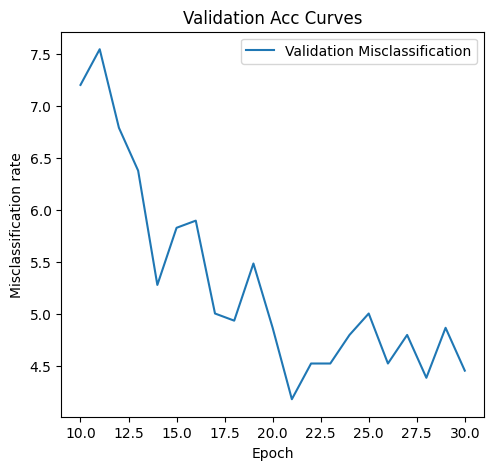

In [205]:
def main():

    seed_everything(config.seed)

    dataset = HandwrittenDigits(train_data)
    train_ids, val_ids= split_ids(train_data.shape[0], 0.8, 0.2)
    train_dataset = torch.utils.data.Subset(dataset, train_ids)
    val_dataset = torch.utils.data.Subset(dataset, val_ids)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)

    criterion = nn.CrossEntropyLoss()
    device = config.device
    model =  Net_2(input_dim, hidden_dim, hidden_dim2, output_dim)
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr, weight_decay=config.weight_decay)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        epochs=config.epochs,
        steps_per_epoch=train_loader.__len__(),
        max_lr=config.lr,
    )

    best_val_loss = float("inf")
    history = {
        "train": {
            "loss": [],
            "acc": [],
            "f1": []
        },
        "valid": {
            "loss": [],
            "acc": [],
            "f1": [],
            "mis":[]
        },
    }
    for epoch in range(config.epochs):
        train_loss, train_acc, train_f1 = train_one_epoch(model, train_loader, optimizer, scheduler, criterion, device)
        valid_loss, valid_acc, valid_f1 = validation(model, val_loader, criterion, device)
        valid_mis = 100-valid_acc

        history["train"]["loss"].append(train_loss)
        history["train"]["acc"].append(train_acc)
        history["train"]["f1"].append(train_f1)
        history["valid"]["loss"].append(valid_loss)
        history["valid"]["acc"].append(valid_acc)
        history["valid"]["mis"].append(valid_mis)
        history["valid"]["f1"].append(valid_f1)

        print(f'Epoch[{epoch+1}/{config.epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Train F1: {train_f1:.2f}% | Valid Loss: {valid_loss:.4f}, Valid Accuracy: {valid_acc:.2f}%, Valid F1: {valid_f1:.2f}% | LR: {optimizer.state_dict()["param_groups"][0]["lr"]:.6f}')

        if valid_loss < best_val_loss:
            save_file = {
                "model": model.state_dict(),
                "optimizer": optimizer.state_dict(),
                "scheduler": scheduler.state_dict(),
                "epoch": epoch,
                "args": config
            }
            best_val_loss = valid_loss
            torch.save(save_file, "checkpoint.pth")

    best_ckpt = torch.load("checkpoint.pth", map_location=device)
    model.load_state_dict(best_ckpt["model"])


    plt.show()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(10,31), history["valid"]["mis"][10:31], label='Validation Misclassification')
    plt.xlabel('Epoch')
    plt.ylabel('Misclassification rate')
    plt.legend()
    plt.title('Validation Acc Curves')
    plt.show()

if __name__ == "__main__":
    main()

In [206]:
def prediction(model, test_loader, device):
    model.eval()
    probability1, predictions1  = [], []
    with torch.no_grad():
        for images in test_loader:
            images = images.to(device=device, dtype=torch.float)

            logits = model(images)
            x = nn.Softmax(dim=1)
            probability = x(logits)
            predictions = torch.argmax(logits, dim=1)

            probability1.append(probability)
            predictions1.append(predictions)


    predictions1 = torch.cat(predictions1)
    probability1 = torch.cat(probability1)

    return probability1, predictions1

In [207]:
input_dim =  256
hidden_dim = 64
hidden_dim2 = 16
output_dim = 10

model = Net_2(input_dim, hidden_dim, hidden_dim2, output_dim)

best_ckpt = torch.load("checkpoint.pth")
model.load_state_dict(best_ckpt["model"])
dataset1 = HandwrittenDigitsfortest(test_data)
test_loader = torch.utils.data.DataLoader(dataset1, batch_size=config.batch_size, shuffle=False)
preds2,pro2 = prediction(model, test_loader, config.device)

In [208]:
print(preds2)
print(pro2)
print(preds2.numpy())
print(pro2.numpy())

tensor([[1.8214e-05, 1.5645e-05, 3.1704e-05,  ..., 5.8269e-03, 2.3188e-03,
         9.8215e-01],
        [6.6336e-03, 1.5235e-03, 3.7587e-02,  ..., 2.8774e-04, 6.0850e-04,
         1.5829e-06],
        [2.0910e-05, 4.7772e-06, 2.0492e-03,  ..., 3.7112e-05, 3.6532e-04,
         1.4762e-04],
        ...,
        [4.7496e-05, 5.8502e-05, 9.6946e-06,  ..., 4.9419e-05, 4.6479e-02,
         6.1978e-03],
        [9.9961e-01, 1.7447e-07, 2.1674e-05,  ..., 1.0121e-04, 9.0844e-06,
         8.6961e-10],
        [1.7198e-06, 9.9156e-01, 3.7047e-04,  ..., 1.6282e-03, 1.8107e-03,
         4.3554e-04]])
tensor([9, 6, 3,  ..., 4, 0, 1])
[[1.82144686e-05 1.56447841e-05 3.17042213e-05 ... 5.82687976e-03
  2.31876969e-03 9.82145965e-01]
 [6.63364539e-03 1.52345421e-03 3.75869982e-02 ... 2.87736359e-04
  6.08501548e-04 1.58292357e-06]
 [2.09098980e-05 4.77724143e-06 2.04922492e-03 ... 3.71118003e-05
  3.65323387e-04 1.47619896e-04]
 ...
 [4.74962144e-05 5.85017915e-05 9.69464782e-06 ... 4.94194355e-05
  4

In [209]:
a = pd.DataFrame(preds2.numpy())
b = pd.DataFrame(pro2.numpy())
result2 = pd.concat([a, b], axis=1)

In [210]:
result2.columns=["0","1","2","3","4","5","6","7","8","9","pred2"]
result2

,0,1,2,3,4,5,6,7,8,9,pred2
0,0.000018,1.564478e-05,0.000032,5.592308e-04,9.038802e-03,0.000045,1.464469e-07,0.005827,0.002319,9.821460e-01,9
1,0.006634,1.523454e-03,0.037587,5.816438e-06,7.017871e-02,0.006270,8.769031e-01,0.000288,0.000609,1.582924e-06,6
2,0.000021,4.777241e-06,0.002049,9.972302e-01,1.517696e-09,0.000145,1.874713e-08,0.000037,0.000365,1.476199e-04,3
3,0.221163,4.758416e-03,0.122297,5.418547e-04,1.618033e-01,0.051256,4.208575e-01,0.012425,0.004703,1.948473e-04,6
4,0.008988,1.790151e-03,0.004520,9.401834e-07,1.469672e-04,0.001463,9.828020e-01,0.000085,0.000203,1.559259e-09,6
...,...,...,...,...,...,...,...,...,...,...,...
2002,0.000455,6.644033e-05,0.008986,9.840075e-01,3.026160e-09,0.005921,1.817773e-06,0.000079,0.000473,9.638212e-06,3
2003,0.000003,1.394485e-04,0.000006,7.953076e-04,6.244272e-03,0.000092,9.212259e-08,0.002331,0.002307,9.880821e-01,9
2004,0.000047,5.850179e-05,0.000010,7.821461e-06,9.465103e-01,0.000281,3.597228e-04,0.000049,0.046479,6.197756e-03,4
2005,0.999610,1.744739e-07,0.000022,8.940714e-07,3.720673e-07,0.000031,2.250685e-04,0.000101,0.000009,8.696131e-10,0


In [211]:
result2.to_csv("Net-2.csv",index=True,header=True)

# 5. Net-3

In [212]:
class Net_3(nn.Module):
    def __init__(self, input_dim, hidden_dim, hidden_dim2 ,hidden_dim3 ,hidden_dim4 ,output_dim):
        super(Net_3, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim3, hidden_dim4)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_dim4, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.relu4(out)
        out = self.fc5(out)

        return out

In [213]:
input_dim =  256
hidden_dim = 64
hidden_dim2 = 64
hidden_dim3 = 16
hidden_dim4 = 16
output_dim = 10

model = Net_3(input_dim, hidden_dim, hidden_dim2, hidden_dim3, hidden_dim4, output_dim)
model

Net_3(
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=16, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=16, out_features=16, bias=True)
  (relu4): ReLU()
  (fc5): Linear(in_features=16, out_features=10, bias=True)
)

In [214]:
def evaluator(preds, gts):

    preds = preds.cpu().numpy() if isinstance(preds, torch.Tensor) else preds
    gts = gts.cpu().numpy() if isinstance(gts, torch.Tensor) else gts

    acc = accuracy_score(preds, gts)
    f1 = f1_score(preds, gts, average="macro")

    return acc, f1

def train_one_epoch(model, train_loader, optimizer, scheduler, criterion, device):
    model.train()
    train_loss = .0
    predictions, ground_truths = [], []
    for images, labels in train_loader:
        images = images.to(device=device, dtype=torch.float)
        labels = labels.to(device=device, dtype=torch.long)

        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()

        optimizer.step()
        scheduler.step()

        train_loss += loss.item()
        preds = torch.argmax(logits, dim=1)

        predictions.append(preds)
        ground_truths.append(labels)

    train_loss /= len(train_loader)

    predictions = torch.cat(predictions)
    ground_truths = torch.cat(ground_truths)
    train_acc, train_f1 = evaluator(predictions, ground_truths)

    return train_loss, 100*train_acc, 100*train_f1

def validation(model, valid_loader, criterion, device):
    model.eval()
    valid_loss = .0
    predictions, ground_truths = [], []
    with torch.no_grad():
        for images, labels in valid_loader:
            images = images.to(device=device, dtype=torch.float)
            labels = labels.to(device=device, dtype=torch.long)

            logits = model(images)
            loss = criterion(logits, labels)

            valid_loss += loss.item()
            preds = torch.argmax(logits, dim=1)

            predictions.append(preds)
            ground_truths.append(labels)

    valid_loss /= len(valid_loader)

    predictions = torch.cat(predictions)
    ground_truths = torch.cat(ground_truths)
    valid_acc, valid_f1 = evaluator(predictions, ground_truths)
    return valid_loss, 100*valid_acc, 100*valid_f1

Epoch[1/100], Train Loss: 2.3246, Train Accuracy: 9.02%, Train F1: 1.65% | Valid Loss: 2.3042, Valid Accuracy: 8.64%, Valid F1: 1.59% | LR: 0.000043
Epoch[2/100], Train Loss: 2.2547, Train Accuracy: 23.08%, Train F1: 17.38% | Valid Loss: 2.1568, Valid Accuracy: 36.76%, Valid F1: 27.84% | LR: 0.000050
Epoch[3/100], Train Loss: 1.9623, Train Accuracy: 39.00%, Train F1: 30.88% | Valid Loss: 1.6374, Valid Accuracy: 51.78%, Valid F1: 37.47% | LR: 0.000063
Epoch[4/100], Train Loss: 1.3657, Train Accuracy: 57.43%, Train F1: 46.11% | Valid Loss: 1.0694, Valid Accuracy: 62.96%, Valid F1: 51.02% | LR: 0.000082
Epoch[5/100], Train Loss: 0.9491, Train Accuracy: 69.62%, Train F1: 62.75% | Valid Loss: 0.8063, Valid Accuracy: 73.66%, Valid F1: 67.61% | LR: 0.000104
Epoch[6/100], Train Loss: 0.7350, Train Accuracy: 78.83%, Train F1: 75.22% | Valid Loss: 0.6453, Valid Accuracy: 81.41%, Valid F1: 78.31% | LR: 0.000132
Epoch[7/100], Train Loss: 0.5962, Train Accuracy: 83.54%, Train F1: 81.18% | Valid Los

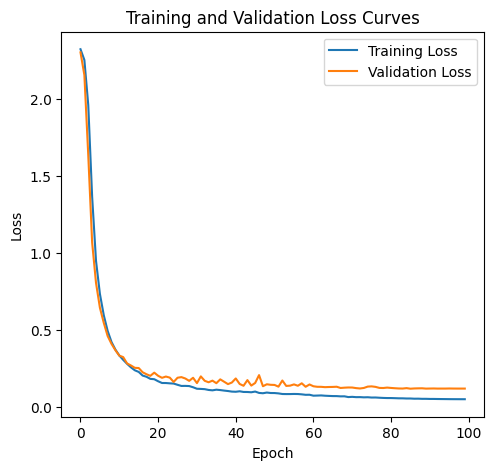

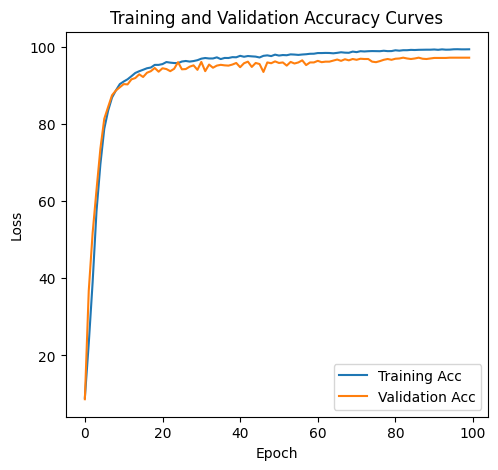

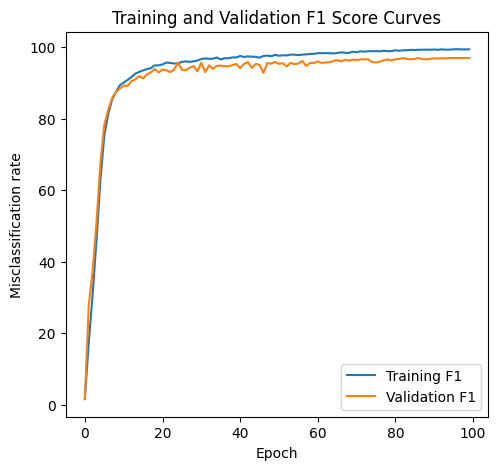

In [215]:
def main():

    seed_everything(config.seed)

    dataset = HandwrittenDigits(train_data)
    train_ids, val_ids= split_ids(train_data.shape[0], 0.8, 0.2)
    train_dataset = torch.utils.data.Subset(dataset, train_ids)
    val_dataset = torch.utils.data.Subset(dataset, val_ids)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)

    criterion = nn.CrossEntropyLoss()
    device = config.device
    model =  Net_3(input_dim, hidden_dim, hidden_dim2, hidden_dim3, hidden_dim4, output_dim)
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr, weight_decay=config.weight_decay)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        epochs=config.epochs,
        steps_per_epoch=train_loader.__len__(),
        max_lr=config.lr,
    )

    best_val_loss = float("inf")
    history = {
        "train": {
            "loss": [],
            "acc": [],
            "f1": []
        },
        "valid": {
            "loss": [],
            "acc": [],
            "f1": []
        },
    }
    for epoch in range(config.epochs):
        train_loss, train_acc, train_f1 = train_one_epoch(model, train_loader, optimizer, scheduler, criterion, device)
        valid_loss, valid_acc, valid_f1 = validation(model, val_loader, criterion, device)

        # Log the loss and validation result
        history["train"]["loss"].append(train_loss)
        history["train"]["acc"].append(train_acc)
        history["train"]["f1"].append(train_f1)
        history["valid"]["loss"].append(valid_loss)
        history["valid"]["acc"].append(valid_acc)
        history["valid"]["f1"].append(valid_f1)

        print(f'Epoch[{epoch+1}/{config.epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Train F1: {train_f1:.2f}% | Valid Loss: {valid_loss:.4f}, Valid Accuracy: {valid_acc:.2f}%, Valid F1: {valid_f1:.2f}% | LR: {optimizer.state_dict()["param_groups"][0]["lr"]:.6f}')

        if valid_loss < best_val_loss:
            save_file = {
                "model": model.state_dict(),
                "optimizer": optimizer.state_dict(),
                "scheduler": scheduler.state_dict(),
                "epoch": epoch,
                "args": config
            }
            best_val_loss = valid_loss
            torch.save(save_file, "checkpoint.pth")

    best_ckpt = torch.load("checkpoint.pth", map_location=device)
    model.load_state_dict(best_ckpt["model"])

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(config.epochs), history["train"]["loss"], label='Training Loss')
    plt.plot(range(config.epochs), history["valid"]["loss"], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss Curves')
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(config.epochs), history["train"]["acc"], label='Training Acc')
    plt.plot(range(config.epochs), history["valid"]["acc"], label='Validation Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Accuracy Curves')
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(config.epochs), history["train"]["f1"], label='Training F1')
    plt.plot(range(config.epochs), history["valid"]["f1"], label='Validation F1')
    plt.xlabel('Epoch')
    plt.ylabel('Misclassification rate')
    plt.legend()
    plt.title('Training and Validation F1 Score Curves')
    plt.show()

if __name__ == "__main__":
    main()

Epoch[1/100], Train Loss: 2.3246, Train Accuracy: 9.02%, Train F1: 1.65% | Valid Loss: 2.3042, Valid Accuracy: 8.64%, Valid F1: 1.59% | LR: 0.000043
Epoch[2/100], Train Loss: 2.2547, Train Accuracy: 23.08%, Train F1: 17.38% | Valid Loss: 2.1568, Valid Accuracy: 36.76%, Valid F1: 27.84% | LR: 0.000050
Epoch[3/100], Train Loss: 1.9623, Train Accuracy: 39.00%, Train F1: 30.88% | Valid Loss: 1.6374, Valid Accuracy: 51.78%, Valid F1: 37.47% | LR: 0.000063
Epoch[4/100], Train Loss: 1.3657, Train Accuracy: 57.43%, Train F1: 46.11% | Valid Loss: 1.0694, Valid Accuracy: 62.96%, Valid F1: 51.02% | LR: 0.000082
Epoch[5/100], Train Loss: 0.9491, Train Accuracy: 69.62%, Train F1: 62.75% | Valid Loss: 0.8063, Valid Accuracy: 73.66%, Valid F1: 67.61% | LR: 0.000104
Epoch[6/100], Train Loss: 0.7350, Train Accuracy: 78.83%, Train F1: 75.22% | Valid Loss: 0.6453, Valid Accuracy: 81.41%, Valid F1: 78.31% | LR: 0.000132
Epoch[7/100], Train Loss: 0.5962, Train Accuracy: 83.54%, Train F1: 81.18% | Valid Los

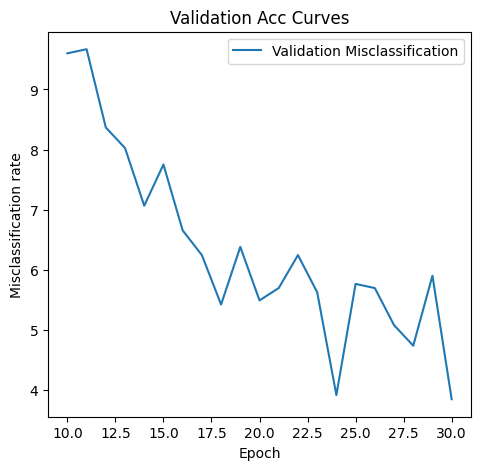

In [218]:
 def main():

    seed_everything(config.seed)

    dataset = HandwrittenDigits(train_data)
    train_ids, val_ids= split_ids(train_data.shape[0], 0.8, 0.2)
    train_dataset = torch.utils.data.Subset(dataset, train_ids)
    val_dataset = torch.utils.data.Subset(dataset, val_ids)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)

    criterion = nn.CrossEntropyLoss()
    device = config.device
    model =  Net_3(input_dim, hidden_dim, hidden_dim2, hidden_dim3, hidden_dim4, output_dim)
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr, weight_decay=config.weight_decay)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        epochs=config.epochs,
        steps_per_epoch=train_loader.__len__(),
        max_lr=config.lr,
    )

    best_val_loss = float("inf")
    history = {
        "train": {
            "loss": [],
            "acc": [],
            "f1": []
        },
        "valid": {
            "loss": [],
            "acc": [],
            "f1": [],
            "mis":[]
        },
    }
    for epoch in range(config.epochs):
        train_loss, train_acc, train_f1 = train_one_epoch(model, train_loader, optimizer, scheduler, criterion, device)
        valid_loss, valid_acc, valid_f1 = validation(model, val_loader, criterion, device)
        valid_mis = 100-valid_acc

        history["train"]["loss"].append(train_loss)
        history["train"]["acc"].append(train_acc)
        history["train"]["f1"].append(train_f1)
        history["valid"]["loss"].append(valid_loss)
        history["valid"]["acc"].append(valid_acc)
        history["valid"]["mis"].append(valid_mis)
        history["valid"]["f1"].append(valid_f1)

        print(f'Epoch[{epoch+1}/{config.epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, Train F1: {train_f1:.2f}% | Valid Loss: {valid_loss:.4f}, Valid Accuracy: {valid_acc:.2f}%, Valid F1: {valid_f1:.2f}% | LR: {optimizer.state_dict()["param_groups"][0]["lr"]:.6f}')

        if valid_loss < best_val_loss:
            save_file = {
                "model": model.state_dict(),
                "optimizer": optimizer.state_dict(),
                "scheduler": scheduler.state_dict(),
                "epoch": epoch,
                "args": config
            }
            best_val_loss = valid_loss
            torch.save(save_file, "checkpoint.pth")

    best_ckpt = torch.load("checkpoint.pth", map_location=device)
    model.load_state_dict(best_ckpt["model"])


    plt.show()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(10,31), history["valid"]["mis"][10:31], label='Validation Misclassification')
    plt.xlabel('Epoch')
    plt.ylabel('Misclassification rate')
    plt.legend()
    plt.title('Validation Acc Curves')
    plt.show()

if __name__ == "__main__":
    main()

In [219]:
def prediction(model, test_loader, device):
    model.eval()
    probability1, predictions1  = [], []
    with torch.no_grad():
        for images in test_loader:
            images = images.to(device=device, dtype=torch.float)

            logits = model(images)
            x = nn.Softmax(dim=1)
            probability = x(logits)
            predictions = torch.argmax(logits, dim=1)

            probability1.append(probability)
            predictions1.append(predictions)


    predictions1 = torch.cat(predictions1)
    probability1 = torch.cat(probability1)

    return probability1, predictions1

In [220]:
input_dim =  256
hidden_dim = 64
hidden_dim2 = 64
hidden_dim3 = 16
hidden_dim4 = 16
output_dim = 10

model = Net_3(input_dim, hidden_dim, hidden_dim2, hidden_dim3, hidden_dim4, output_dim)

best_ckpt = torch.load("checkpoint.pth")
model.load_state_dict(best_ckpt["model"])
dataset1 = HandwrittenDigitsfortest(test_data)
test_loader = torch.utils.data.DataLoader(dataset1, batch_size=config.batch_size, shuffle=False)
preds3,pro3 = prediction(model, test_loader, config.device)

In [221]:
print(preds3)
print(pro3)
print(preds3.numpy())
print(pro3.numpy())

tensor([[3.4612e-08, 1.7768e-04, 3.0872e-07,  ..., 2.9730e-03, 3.0967e-04,
         9.9402e-01],
        [4.6496e-03, 7.3226e-05, 5.8484e-03,  ..., 3.3666e-05, 1.0778e-03,
         5.4668e-08],
        [5.4069e-05, 4.4003e-08, 7.2816e-05,  ..., 2.6668e-04, 4.7737e-04,
         1.8881e-05],
        ...,
        [7.6195e-07, 4.9064e-05, 5.8478e-08,  ..., 7.2884e-06, 5.1490e-03,
         5.7714e-04],
        [9.9937e-01, 1.2286e-11, 3.7721e-04,  ..., 1.2406e-04, 2.4939e-07,
         2.1167e-12],
        [7.4667e-10, 9.9596e-01, 1.2771e-03,  ..., 1.4796e-06, 1.4399e-03,
         3.5340e-04]])
tensor([9, 6, 3,  ..., 4, 0, 1])
[[3.4611940e-08 1.7768274e-04 3.0872064e-07 ... 2.9730264e-03
  3.0966618e-04 9.9402171e-01]
 [4.6496121e-03 7.3225572e-05 5.8484450e-03 ... 3.3665790e-05
  1.0777693e-03 5.4667673e-08]
 [5.4068776e-05 4.4003173e-08 7.2816081e-05 ... 2.6668006e-04
  4.7737308e-04 1.8881245e-05]
 ...
 [7.6195062e-07 4.9064045e-05 5.8478445e-08 ... 7.2883877e-06
  5.1489733e-03 5.7713880

In [222]:
c = pd.DataFrame(preds3.numpy())
d = pd.DataFrame(pro3.numpy())
result3 = pd.concat([c, d], axis=1)

In [223]:
result3.columns=["0","1","2","3","4","5","6","7","8","9","pred2"]
result3

,0,1,2,3,4,5,6,7,8,9,pred2
0,3.461194e-08,1.776827e-04,3.087206e-07,2.360426e-04,2.270769e-03,1.078294e-05,2.159647e-09,0.002973,3.096662e-04,9.940217e-01,9
1,4.649612e-03,7.322557e-05,5.848445e-03,7.139671e-08,2.316468e-02,2.877701e-04,9.648647e-01,0.000034,1.077769e-03,5.466767e-08,6
2,5.406878e-05,4.400317e-08,7.281608e-05,9.990990e-01,3.547137e-11,1.121715e-05,4.441639e-10,0.000267,4.773731e-04,1.888124e-05,3
3,3.915130e-01,1.920126e-04,9.361635e-02,6.294017e-05,1.772160e-02,7.692952e-03,4.756981e-01,0.008249,5.248705e-03,5.026268e-06,6
4,9.144413e-03,4.236109e-07,4.161061e-04,1.467706e-08,9.085057e-04,7.502692e-04,9.886168e-01,0.000001,1.621534e-04,2.560769e-10,6
...,...,...,...,...,...,...,...,...,...,...,...
2002,2.581062e-03,1.548895e-08,7.748278e-05,9.949964e-01,8.193545e-10,9.021880e-04,2.699186e-08,0.000772,6.625637e-04,7.982894e-06,3
2003,3.523972e-08,1.645275e-04,1.180977e-07,6.423029e-04,2.687362e-03,6.646091e-05,4.172568e-09,0.001050,9.550281e-04,9.944336e-01,9
2004,7.619506e-07,4.906405e-05,5.847845e-08,1.010389e-06,9.824838e-01,1.153836e-02,1.934872e-04,0.000007,5.148973e-03,5.771388e-04,4
2005,9.993706e-01,1.228574e-11,3.772105e-04,8.518666e-07,9.043623e-09,4.797228e-05,7.913214e-05,0.000124,2.493896e-07,2.116704e-12,0


In [224]:
result3.to_csv("Net-3.csv",index=True,header=True)